# LBM 1D Code Example

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import clear_output

## Problem Definiton

Define diffusivity $D$, domain length $L$ and maximum time $t_{max}$

In [2]:
D = 0.2
L = 1.0
t_max = 1

cr = 10

In [3]:
def ic(x, L):
    return np.exp(-((x - L / 2) / 0.1) ** 2)

## Numerical parameters
Define number of lattice nodes $nx$, number of time steps $nt$ and the weighting factor $\theta$. The refinement factor $rf<1$ allows to increase resolution according to the diffusive scaling.

In [4]:
nx = 16
nt = 80
theta = 1/3
rf = 1/2

## Preprocessing
 - Compute the discretization to be used in the analysis: $nx\leftarrow nx/rf$ and $nt\leftarrow nt/rf^2$
 - Determine lattice spacing $\Delta x = L/nx$ and time step size $\Delta t = t_{max}/nt$
 - Setup an array of lattice node locations (assuming $\Delta x/2$ padding at the left and right side of the $(0,L)$ domain
 - Calculate the relaxation rate $\omega$

In [5]:
nx = int(nx/rf);
nt = int(nt/rf**2);
dx = L/nx;
dt = t_max/nt;
x_domain = np.arange(dx/2, L, dx)
omega = 1/(D*dt/dx**2/theta+0.5);

## Initialization
 - Define the local equilibrium $f^{eq}(u)$
 - Initialize the population vector at equilibrium

Layout of the pre- and post-collision population array: $[q \times n_{ghost}]$, where $q=3$ is the number of populations and $n_{ghost}=nx+2$ the number of lattice nodes + 1 extra outside node on the left and right side of the domain

In [6]:
def feq(u):
    return np.array([
        (1 - theta) * u,
        (theta / 2) * u,
        (theta / 2) * u
    ])

f = feq(ic(x_domain,L))

## Definition of a single LBM time step
 - Compute zeroth-order moment $u^{num} = \sum_i f_i$
 - Perform collision
 - Perform streaming
 - Apply periodic boundary conditions

In [7]:
def timestep(f, omega):
    unum = np.sum(f, axis=0)
    fpost = omega*feq(unum) + (1-omega)*f

    f[0,:] = fpost[0,:]
    f[1,1:] = fpost[1,:-1]
    f[2,:-1] = fpost[2,1:]

    f[1,0] = fpost[1,-1]
    f[2,-1] = fpost[2,0]
    
    return f, unum

## Time step loop

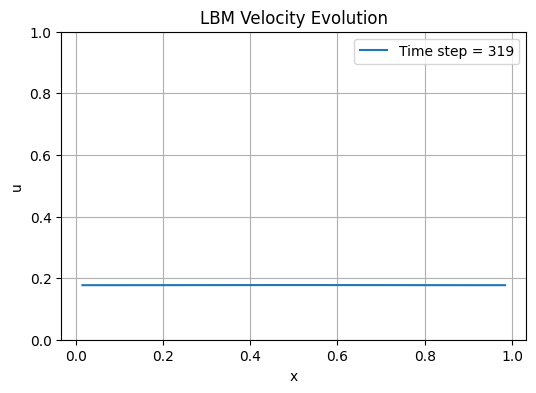

In [8]:
for it in range(nt):
    # Run the LBM update
    f, unum = timestep(f, omega)

    if it%cr == 0 or it == nt-1:
        # Clear previous plot for animation effect
        clear_output(wait=True)
    
        # Plot u over x_domain
        plt.figure(figsize=(6, 4))
        plt.plot(x_domain, unum, label=f"Time step = {it}")
        plt.xlabel("x")
        plt.ylabel("u")
        plt.title("LBM Velocity Evolution")
        plt.grid(True)
        plt.ylim((0,1))
        plt.legend()
        plt.show()